In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
csv_in = 'pcr_tested_2022.csv'
df1 = pd.read_csv(csv_in,sep=',',skiprows=0,header=0)
print(df1.shape)
print(df1.info())
display(df1.head())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     365 non-null    object
 1   pcr_num  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


,Date,pcr_num
0,2022/1/1,7002
1,2022/1/2,11365
2,2022/1/3,5605
3,2022/1/4,87417
4,2022/1/5,85750


In [3]:
csv_in = 'newly_confirmed_cases_daily_2022.csv'
df2 = pd.read_csv(csv_in,sep=',',skiprows=0,header=0)
print(df2.shape)
print(df2.info())
display(df2.head())

(365, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       365 non-null    object
 1   ALL        365 non-null    int64 
 2   Hokkaido   365 non-null    int64 
 3   Aomori     365 non-null    int64 
 4   Iwate      365 non-null    int64 
 5   Miyagi     365 non-null    int64 
 6   Akita      365 non-null    int64 
 7   Yamagata   365 non-null    int64 
 8   Fukushima  365 non-null    int64 
 9   Ibaraki    365 non-null    int64 
 10  Tochigi    365 non-null    int64 
 11  Gunma      365 non-null    int64 
 12  Saitama    365 non-null    int64 
 13  Chiba      365 non-null    int64 
 14  Tokyo      365 non-null    int64 
 15  Kanagawa   365 non-null    int64 
 16  Niigata    365 non-null    int64 
 17  Toyama     365 non-null    int64 
 18  Ishikawa   365 non-null    int64 
 19  Fukui      365 non-null    int64 
 20  Yamanashi  365 non-nul

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2022/1/1,466,24,0,1,1,0,0,2,2,...,0,0,19,0,1,0,0,0,0,46
1,2022/1/2,432,6,0,0,1,0,0,6,2,...,0,0,4,0,1,0,0,0,1,53
2,2022/1/3,788,15,2,3,3,0,1,1,5,...,0,2,12,1,1,1,1,1,4,128
3,2022/1/4,1094,30,2,1,5,0,1,3,9,...,2,2,26,5,8,0,1,0,1,216
4,2022/1/5,2788,60,7,3,2,0,13,12,14,...,6,6,47,10,16,3,2,3,19,629


In [4]:
df1['Date'] = pd.to_datetime(df1['Date'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     365 non-null    datetime64[ns]
 1   pcr_num  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


In [5]:
df2['Date'] = pd.to_datetime(df2['Date'])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       365 non-null    datetime64[ns]
 1   ALL        365 non-null    int64         
 2   Hokkaido   365 non-null    int64         
 3   Aomori     365 non-null    int64         
 4   Iwate      365 non-null    int64         
 5   Miyagi     365 non-null    int64         
 6   Akita      365 non-null    int64         
 7   Yamagata   365 non-null    int64         
 8   Fukushima  365 non-null    int64         
 9   Ibaraki    365 non-null    int64         
 10  Tochigi    365 non-null    int64         
 11  Gunma      365 non-null    int64         
 12  Saitama    365 non-null    int64         
 13  Chiba      365 non-null    int64         
 14  Tokyo      365 non-null    int64         
 15  Kanagawa   365 non-null    int64         
 16  Niigata    365 non-null    int64         
 1

In [6]:
df_merge = pd.merge(df1,df2,how='inner',on='Date')
display(df_merge.head())

,Date,pcr_num,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2022-01-01,7002,466,24,0,1,1,0,0,2,...,0,0,19,0,1,0,0,0,0,46
1,2022-01-02,11365,432,6,0,0,1,0,0,6,...,0,0,4,0,1,0,0,0,1,53
2,2022-01-03,5605,788,15,2,3,3,0,1,1,...,0,2,12,1,1,1,1,1,4,128
3,2022-01-04,87417,1094,30,2,1,5,0,1,3,...,2,2,26,5,8,0,1,0,1,216
4,2022-01-05,85750,2788,60,7,3,2,0,13,12,...,6,6,47,10,16,3,2,3,19,629


In [7]:
df_merge = df_merge.set_index('Date')

In [8]:
df_rolling = df_merge.rolling('7D').mean()
display(df_rolling.head())

,pcr_num,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,7002.000000,466.0,24.00,0.000000,1.000000,1.000000,0.0,0.000000,2.0,2.0,...,0.0,0.000000,19.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,46.000000
2022-01-02,9183.500000,449.0,15.00,0.000000,0.500000,1.000000,0.0,0.000000,4.0,2.0,...,0.0,0.000000,11.500000,0.000000,1.00,0.000000,0.000000,0.000000,0.500000,49.500000
2022-01-03,7990.666667,562.0,15.00,0.666667,1.333333,1.666667,0.0,0.333333,3.0,3.0,...,0.0,0.666667,11.666667,0.333333,1.00,0.333333,0.333333,0.333333,1.666667,75.666667
2022-01-04,27847.250000,695.0,18.75,1.000000,1.250000,2.500000,0.0,0.500000,3.0,4.5,...,0.5,1.000000,15.250000,1.500000,2.75,0.250000,0.500000,0.250000,1.500000,110.750000
2022-01-05,39427.800000,1113.6,27.00,2.200000,1.600000,2.400000,0.0,3.000000,4.8,6.4,...,1.6,2.000000,21.600000,3.200000,5.40,0.800000,0.800000,0.800000,5.000000,214.400000


In [9]:
df_rolling['positive_rate'] = df_rolling['ALL'] / df_rolling['pcr_num']
display(df_rolling.tail(31))

,pcr_num,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa,positive_rate
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-01,160887.000000,110616.714286,7972.428571,1439.571429,1613.857143,3525.571429,1340.428571,1528.000000,2564.857143,2549.000000,...,522.428571,3081.142857,731.142857,716.142857,1181.428571,791.857143,580.000000,589.285714,502.142857,0.687543
2022-12-02,168337.857143,109632.857143,7604.142857,1367.714286,1498.857143,3553.428571,1286.142857,1475.571429,2513.142857,2446.285714,...,505.714286,3121.285714,709.142857,698.142857,1154.285714,775.142857,573.000000,586.285714,494.714286,0.651267
2022-12-03,175585.000000,107387.142857,7256.285714,1334.714286,1460.428571,3453.428571,1264.857143,1382.000000,2447.000000,2519.714286,...,499.142857,3029.285714,700.285714,693.571429,1159.714286,755.000000,554.285714,577.285714,516.857143,0.611596
2022-12-04,167717.571429,106132.428571,7046.714286,1318.714286,1434.571429,3334.142857,1267.142857,1357.000000,2405.142857,2493.857143,...,506.714286,3009.428571,689.142857,690.857143,1165.000000,736.142857,560.714286,573.571429,523.714286,0.632804
2022-12-05,165715.428571,105922.571429,6944.714286,1310.571429,1434.857143,3328.571429,1267.000000,1350.142857,2417.428571,2486.285714,...,507.857143,3032.571429,697.428571,696.428571,1189.142857,741.428571,566.857143,581.285714,529.714286,0.639184
2022-12-06,165690.285714,107323.428571,6720.000000,1302.857143,1422.142857,3314.571429,1288.571429,1356.000000,2424.857143,2470.285714,...,522.142857,3169.428571,726.000000,738.428571,1266.857143,769.142857,618.428571,604.000000,555.571429,0.647735
2022-12-07,163538.142857,108878.428571,6449.285714,1294.000000,1413.571429,3278.714286,1287.000000,1313.142857,2439.714286,2533.714286,...,538.142857,3353.285714,773.428571,789.285714,1308.714286,785.571429,660.142857,627.285714,563.857143,0.665768
2022-12-08,173485.428571,111006.000000,6310.571429,1328.428571,1398.000000,3292.714286,1274.714286,1299.285714,2467.571429,2584.571429,...,551.714286,3581.142857,798.000000,838.714286,1400.714286,831.000000,716.428571,643.142857,579.428571,0.639858
2022-12-09,163644.571429,113542.714286,6106.000000,1347.571429,1410.000000,3283.714286,1287.285714,1305.857143,2489.285714,2630.428571,...,585.285714,3829.714286,846.000000,887.428571,1526.571429,905.000000,788.000000,665.142857,597.714286,0.693837


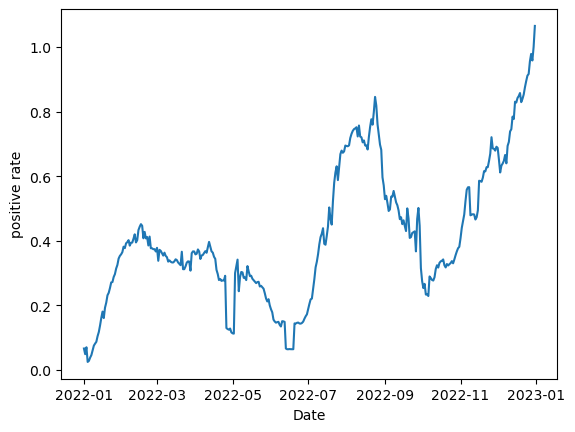

In [34]:
plt.plot(df_rolling.index,df_rolling['positive_rate'])
plt.xlabel('Date')
plt.ylabel('positive rate')
plt.show()

In [26]:
X = df_rolling[['pcr_num']]
y = df_rolling['ALL']

In [27]:
X_c = sm.add_constant(X)
display(X.head())
display(X_c.head())

,pcr_num
Date,
2022-01-01,7002.000000
2022-01-02,9183.500000
2022-01-03,7990.666667
2022-01-04,27847.250000
2022-01-05,39427.800000


,const,pcr_num
Date,,
2022-01-01,1.0,7002.000000
2022-01-02,1.0,9183.500000
2022-01-03,1.0,7990.666667
2022-01-04,1.0,27847.250000
2022-01-05,1.0,39427.800000


In [28]:
model = sm.OLS(y,X_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ALL   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     576.3
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.12e-77
Time:                        15:24:15   Log-Likelihood:                -4345.3
No. Observations:                 365   AIC:                             8695.
Df Residuals:                     363   BIC:                             8702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.146e+04   5137.069     -8.071      0.0

In [29]:
print('R2:',results.rsquared)
print('Adj R2:',results.rsquared_adj)

R2: 0.6135396756780033
Adj R2: 0.6124750466853808


In [30]:
a0 = results.params['const']
a1 = results.params['pcr_num']
x_min = X['pcr_num'].min()
x_max = X['pcr_num'].max()
x_min_max = np.array([x_min,x_max])
y_min_max = a0 + a1 * x_min_max

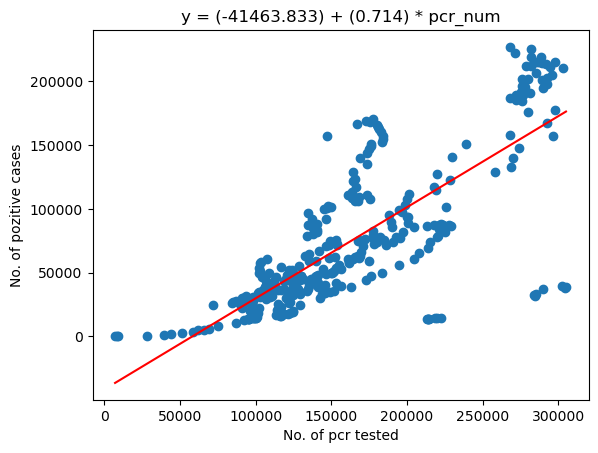

In [32]:
plt.title('y = ({:.3f}) + ({:.3f}) * pcr_num'.format(a0,a1))
plt.scatter(X['pcr_num'],y)
plt.plot(x_min_max,y_min_max,c='red')
plt.xlabel('No. of pcr tested')
plt.ylabel('No. of pozitive cases')
plt.show()